In [1]:
#ML Assignment 2
#Rohit Jain 41434

import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as mp
from sklearn.tree import DecisionTreeClassifier
import math

In [2]:
data = {
    'age': ['<21', '<21', '21-35', '>35', '>35', '>35', '21-35', '<21', '<21', '>35', '<21', '21-35', '21-35', '>35'], 
    'income':['high','high','high','medium','low','low','low','medium','low','medium','medium','medium','high','medium'],
    'gender':['male','male','male','male','female','female','female','male','female','female','female','male','female','male'],
    'marital_status':['single', 'married', 'single', 'single', 'single', 'married', 'married', 'single', 'married','single','married','married','single','married'],
    'buys':['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']
} 
df = pd.DataFrame.from_dict(data) 

In [3]:
df.head()

,age,income,gender,marital_status,buys
0,<21,high,male,single,no
1,<21,high,male,married,no
2,21-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes


In [4]:
df.describe()

,age,income,gender,marital_status,buys
count,14,14,14,14,14
unique,3,3,2,2,2
top,<21,medium,male,single,yes
freq,5,6,7,7,9


In [5]:
rows = df.shape[0]
labels = df.buys.unique()
values= df.buys.value_counts()
target_gini =0

for i in range(0,len(values)):
    probability = values[labels[i]]/rows
    target_gini = target_gini + (probability**2)

target_gini = 1 - target_gini

print("Gini(Dataset) : ",target_gini)

Gini(Dataset) :  0.4591836734693877


In [6]:
def gini(feature,target,count):
    gini= 0
    gini_values=list()
    
    yes_probability = 0
    no_probability = 0
    labels=np.unique(feature) 
    
    for i in range(0,len(labels)):
        yes_probability = 0
        gini = 0
        no_probability = 0
        for j in range(0,len(values)):
            if feature[j]==labels[i] and target[j]=='yes':
                yes_probability = yes_probability+1
            if feature[j]==labels[i] and target[j]=='no':
                no_probability = no_probability+1
        gini = ((yes_probability/count[labels[i]])**2) + ((no_probability/count[labels[i]])**2)
        gini = 1 - gini
        gini_values.append(gini)
        print("Gini(",labels[i],"): ",gini)
    return gini_values
        

In [7]:
#Calculating Information Gain
def info_gain(feature,gini_values,target_gini,count):
    gain = 0
    labels=np.unique(feature)
    for i in range(0,len(labels)):
        gain = gain+count[labels[i]]/rows * gini_values[i]
    return target_gini - gain

In [8]:
values = df['age'].values
target = df['buys'].values
count = df['age'].value_counts()
gini_age = gini(values,target,count)
gain_age = info_gain(values,gini_age,target_gini,count)
print("Information gain(age) : ",gain_age)

Gini( 21-35 ):  0.0
Gini( <21 ):  0.48
Gini( >35 ):  0.48
Information gain(age) :  0.11632653061224485


In [9]:
values = df['income'].values
count = df['income'].value_counts()
gini_income = gini(values,target,count)
gain_income = info_gain(values,gini_income,target_gini,count)
print("Information gain(income) : ",gain_income)

Gini( high ):  0.5
Gini( low ):  0.375
Gini( medium ):  0.4444444444444444
Information gain(income) :  0.018707482993197244


In [10]:
values = df['gender'].values
count = df['gender'].value_counts()
gini_gender = gini(values,target,count)
gain_gender = info_gain(values,gini_gender,target_gini,count)
print("Information gain(gender) : ",gain_gender)

Gini( female ):  0.24489795918367352
Gini( male ):  0.48979591836734704
Information gain(gender) :  0.09183673469387743


In [11]:
values = df['marital_status'].values
count = df['marital_status'].value_counts()
gini_marital_status = gini(values,target,count)
gain_marital_status = info_gain(values,gini_marital_status,target_gini,count)
print("Information gain(marital_status) : ",gain_marital_status)

Gini( married ):  0.48979591836734704
Gini( single ):  0.40816326530612246
Information gain(marital_status) :  0.010204081632652962


In [12]:
root = max(gain_age,gain_income,gain_gender,gain_marital_status)
print(root)

0.11632653061224485


In [13]:
X = df.iloc[:,[0,1,2,3]].values
Y = df.iloc[:,-1].values

In [14]:
print(X)
print(Y)

[['<21' 'high' 'male' 'single']
 ['<21' 'high' 'male' 'married']
 ['21-35' 'high' 'male' 'single']
 ['>35' 'medium' 'male' 'single']
 ['>35' 'low' 'female' 'single']
 ['>35' 'low' 'female' 'married']
 ['21-35' 'low' 'female' 'married']
 ['<21' 'medium' 'male' 'single']
 ['<21' 'low' 'female' 'married']
 ['>35' 'medium' 'female' 'single']
 ['<21' 'medium' 'female' 'married']
 ['21-35' 'medium' 'male' 'married']
 ['21-35' 'high' 'female' 'single']
 ['>35' 'medium' 'male' 'married']]
['no' 'no' 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'yes'
 'no']


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
length = X.shape[1]
i = 0
while i < length:
    X[:,i] = le.fit_transform(X[:,i])
    i = i+1

In [16]:
#Using sklearn Decision Tree model with GINI INDEX 
dc = DecisionTreeClassifier(criterion='gini')
dc = dc.fit(X,Y)

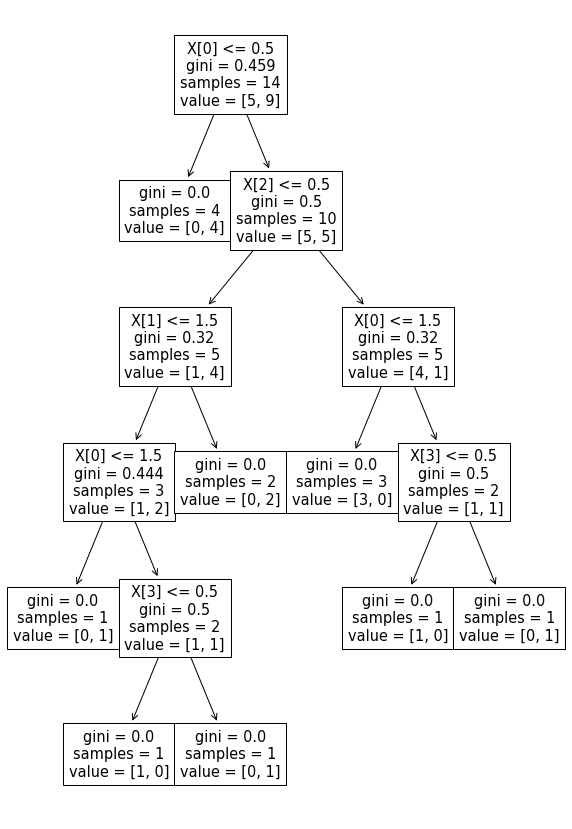

In [17]:
from sklearn import tree
fig = mp.figure(figsize=(10,15))
image = tree.plot_tree(dc)

In [18]:
predicted_set = dc.predict(X)
# Predicting
print("Age < 21 (1), Income = Low (1), Gender = Female (0), Marital Status = Married (0)")
print("Prediction: " , dc.predict([[1, 1, 0, 0]]))

Age < 21 (1), Income = Low (1), Gender = Female (0), Marital Status = Married (0)
Prediction:  ['yes']


In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score

cm = confusion_matrix(Y, predicted_set)
ascore = accuracy_score(Y, predicted_set)
fscore = f1_score(Y, predicted_set, pos_label="no")

print("Confusion Matrix: \n", cm)
print("Accuracy Score: ", ascore)
print("F1-Score: ", fscore)

Confusion Matrix: 
 [[5 0]
 [0 9]]
Accuracy Score:  1.0
F1-Score:  1.0
